In [77]:
import geopandas as geop
import pandas as pd
import numpy as np
import warnings

In [78]:
# Reading crimes csv file

crime_hist = pd.read_csv('MPS LSOA Level Crime (Historical).csv')

In [79]:
# New data set with 2011 colums and new variable with sum calculation by row. 

crime_2011 = crime_hist[crime_hist.columns[crime_hist.columns.str.startswith(('2011'))]]
crime_2011_totals = crime_2011.sum(axis=1)

In [80]:
# New data set with 2021 colums and new variable with sum calculation by LSOA (row). 

crime_2021 = crime_hist[crime_hist.columns[crime_hist.columns.str.startswith(('2021'))]]
crime_2021_totals = crime_2021.sum(axis=1)

In [81]:
# Copy of crime data and merging of 2011 and 2021 totals by row

crime_cases = crime_hist
crime_cases ['2011 Crime Cases'] = crime_2011_totals
crime_cases ['2021 Crime Cases'] = crime_2021_totals

In [82]:
# Selection of column

crime_cases = crime_cases[['LSOA Code', 'LSOA Name', '2011 Crime Cases', '2021 Crime Cases']]

In [83]:
# Group by and summary of the dataset, grouping by LSOA Code and Name and them summary of totals by LSOA for 2011 and 2021

crime = crime_cases.groupby(['LSOA Code','LSOA Name']).agg(
    LSOA_Crime2011 =('2011 Crime Cases', 'sum'),
    LSOA_Crime2021 =('2021 Crime Cases', 'sum')
)

crime.head(5)

,,LSOA_Crime2011,LSOA_Crime2021
LSOA Code,LSOA Name,,
E01000006,Barking and Dagenham 016A,98,94
E01000007,Barking and Dagenham 015A,355,507
E01000008,Barking and Dagenham 015B,161,224
E01000009,Barking and Dagenham 016B,308,298
E01000011,Barking and Dagenham 016C,107,111


In [84]:
# Read in population by place of birth data 2011 and selection of relevant columns

POB_2011 = pd.read_excel('Country of birth.xlsx', sheet_name= '2011')
POB_2011 = POB_2011 [['LSOA code', 'All Usual residents','United Kingdom']]
POB_2011['Non UK Percentage']= 1-(POB_2011['United Kingdom']/POB_2011['All Usual residents'])

POB_2011.drop(columns='United Kingdom', inplace=True)
#POB_2011 = POB_2011 [['LSOA code', 'All Usual residents', 'Non UK Percentage']]
POB_2011 = POB_2011.rename(columns={'LSOA code': 'LSOA Code'})
POB_2011.head(5)

,LSOA Code,All Usual residents,Non UK Percentage
0,E01000001,1465,0.326962
1,E01000002,1436,0.270195
2,E01000003,1346,0.324666
3,E01000005,985,0.392893
4,E01032739,1044,0.501916


In [85]:
# Read in population by place of birth data 2021 and selection of relevant columns

POB_2021 = pd.read_excel('Country of birth.xlsx', sheet_name= '2021')
POB_2021 = POB_2021 [['LSOA code', 'All Usual residents','United Kingdom']]
POB_2021['Non UK Percentage']= 1-(POB_2021['United Kingdom']/POB_2021['All Usual residents'])
POB_2021.drop(columns='United Kingdom' ,inplace=True)

POB_2021 = POB_2021.rename(columns={'LSOA code': 'LSOA Code'})
POB_2021.head(5)

,LSOA Code,All Usual residents,Non UK Percentage
0,E01000001,1478,0.408660
1,E01000002,1382,0.450796
2,E01000003,1613,0.429014
3,E01000005,1098,0.485428
4,E01032739,1621,0.570019


In [86]:
# Find number of null values in POB 2011 and 2022 datasets

# Find mean, count and number of null values for each dataset

# To fix: printing out the fivenum values(i.e. min, 2nd, 3rd, 4th quartile and max)


yearnum = int()

for n in [POB_2011, POB_2021]:
    data_name = [name for name, obj in locals().items() if obj is n][0]
    n['Non UK Percentage'] = pd.Series(n['Non UK Percentage'])
    #Get summary statistics
    #%8.2f
    fivenum_summary = np.percentile(n['Non UK Percentage'].astype(float).dropna(), [0, 25, 50, 75, 100])
    print("{} statistics:".format(data_name) + " Min:{}".format(round(fivenum_summary[0],3)) + ", Q1:{} ".format(round(fivenum_summary[1],3)) + ", Median:{}".format(round(fivenum_summary[2],3))  + ", Q3:{}".format(round(fivenum_summary[3],3)) + ", Max:{}".format(round(fivenum_summary[4],3)))
    
    print("Mean Non UK population percentage for {} ".format(data_name) + " is "+  str(n['Non UK Percentage'].mean()))
    print("Number of null population percentage values for {} ".format(data_name) + " is "+  str(n['Non UK Percentage'].isnull().sum()))
    print("Count of LSOAs with population percentage values  for {} ".format(data_name) + " is "+  str(n['Non UK Percentage'].count()))


POB_2011 statistics: Min:0.036, Q1:0.258 , Median:0.373, Q3:0.468, Max:0.823
Mean Non UK population percentage for POB_2011  is 0.3629362549727461
Number of null population percentage values for POB_2011  is 37
Count of LSOAs with population percentage values  for POB_2011  is 4957
POB_2021 statistics: Min:0.045, Q1:0.309 , Median:0.408, Q3:0.495, Max:0.816
Mean Non UK population percentage for POB_2021  is 0.40152347080770884
Number of null population percentage values for POB_2021  is 0
Count of LSOAs with population percentage values  for POB_2021  is 4994


In [87]:
# Outer join with 2011 population

crime = crime.merge(POB_2011, on='LSOA Code', how='outer')

In [88]:
# Change of column name

crime = crime.rename(columns={'All Usual residents': '2011 Population'})

In [89]:
# Outer join with 2021 population

crime = crime.merge(POB_2021, on='LSOA Code', how='outer')

In [90]:
# Change of column name

crime = crime.rename(columns={'All Usual residents': '2021 Population'})
crime=crime.rename(columns={'Non UK Percentage_x': '2011 Non UK Percentage'})
crime=crime.rename(columns={'Non UK Percentage_y': '2021 Non UK Percentage'})

In [91]:
crime.head(5)

,LSOA Code,LSOA_Crime2011,LSOA_Crime2021,2011 Population,2011 Non UK Percentage,2021 Population,2021 Non UK Percentage
0,E01000006,98.0,94.0,1703,0.513212,1842,0.517915
1,E01000007,355.0,507.0,1391,0.545651,2907,0.579635
2,E01000008,161.0,224.0,1544,0.522021,1795,0.486908
3,E01000009,308.0,298.0,1773,0.586012,1806,0.601883
4,E01000011,107.0,111.0,1634,0.569767,1698,0.608952


In [92]:
# Checking if there are any missing values. There are 6 rows missing crime data. 

crime.isnull().sum()

LSOA Code                  0
LSOA_Crime2011             6
LSOA_Crime2021             6
2011 Population            0
2011 Non UK Percentage    37
2021 Population            0
2021 Non UK Percentage     0
dtype: int64

In [93]:
# Crime copy for final dataset
crime_final = crime.copy()

In [94]:
# Calculation of 2011 crime rate by 1000 people

crime_final ['2011 Crime/1000 people'] = crime_final ['LSOA_Crime2011']/ (crime_final['2011 Population']/1000)

In [95]:
# Calculation of 2021 crime rate by 1000 people

crime_final ['2021 Crime/1000 people'] = crime_final ['LSOA_Crime2021']/ (crime_final['2021 Population']/1000)



In [96]:
# Read the crime data of 2021 for City of London
crime_col2021 = pd.read_csv('2021-city-of-london-street.csv')
crime_col2021.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2021-01,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
1,NaN,2021-01,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
2,455f0a5e2aa0b0998be8adce21c42e362d85cb5cd0e31a...,2021-01,City of London Police,City of London Police,-0.097334,51.521567,On or near Fann Street,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified,NaN
3,19f06058a3b0aa0e79eabc017b48862f2a6a06645b2f5c...,2021-01,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified,NaN
4,c1554ced3041294d44478a0a789b2a5a52bff2ad27674b...,2021-01,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Shoplifting,Status update unavailable,NaN


In [97]:
# Select rows of LSOA codes that have NaN values in the Final crime data

na_lsoa = ['E01000001', 'E01000002', 'E01000003', 'E01000005', 'E01032739', 'E01032740']
crime_col2021_filtered = crime_col2021[crime_col2021['LSOA code'].isin(na_lsoa) == True]
crime_col2021_filtered = crime_col2021_filtered.groupby('LSOA code').size().reset_index(name = 'LSOA_Crime2021')
crime_col2021_filtered.rename(columns={'LSOA code': 'LSOA Code'}, inplace=True)
crime_col2021_filtered

,LSOA Code,LSOA_Crime2021
0,E01000001,179
1,E01000002,244
2,E01000003,81
3,E01000005,509
4,E01032739,3762
5,E01032740,777


In [99]:
# Now we calculate the crime rate for LSOAs beside the City of London, and one for the City of London alone
crime_met = crime_final[crime_final['LSOA Code'].isin(na_lsoa) == False]
crime_col = crime_final[crime_final['LSOA Code'].isin(na_lsoa) == True]

crime_col['LSOA_Crime2021'] = crime_col2021_filtered['LSOA_Crime2021'].values
crime_col['2021 Crime/1000 people'] = crime_col['LSOA_Crime2021'] / (crime_col['2021 Population']/1000)

crime_2021_met_mean = crime_met['LSOA_Crime2021'].sum() / crime_met['LSOA Code'].count()
crime_2021_col_mean = crime_col['LSOA_Crime2021'].sum() / crime_col['LSOA Code'].count()

crime_diff = (crime_2021_col_mean - crime_2021_met_mean) / crime_2021_met_mean

print('The mean crime cases number for 2021 for the Metropolitan area is', crime_2021_met_mean)
print('The mean crime cases number for 2021 for the City of London is', crime_2021_col_mean)
print('The difference in percentage between the two crime rates is', crime_diff*100, '%')

The mean crime cases number for 2021 for the Metropolitan area is 150.09282277465917
The mean crime cases number for 2021 for the City of London is 925.3333333333334
The difference in percentage between the two crime rates is 516.5073827164782 %


/var/folders/tl/3k436bpn4w7328qlykmvjq3m0000gn/T/ipykernel_45100/2094609113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_col['LSOA_Crime2021'] = crime_col2021_filtered['LSOA_Crime2021'].values
/var/folders/tl/3k436bpn4w7328qlykmvjq3m0000gn/T/ipykernel_45100/2094609113.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_col['2021 Crime/1000 people'] = crime_col['LSOA_Crime2021'] / (crime_col['2021 Population']/1000)


In [100]:
# Now we calculate the crime rate of City of London in 2011 with that of the Metropolitan area and the same growth rate


crime_2011_met_mean = crime_met['LSOA_Crime2011'].sum() / crime_met['LSOA Code'].count()
crime_2011_col_mean = round(crime_2011_met_mean * (1 + crime_diff))
crime_col['LSOA_Crime2011'] = crime_2011_col_mean
crime_col['2011 Crime/1000 people'] = crime_col['LSOA_Crime2011'] / (crime_col['2011 Population']/1000)
crime_col

/var/folders/tl/3k436bpn4w7328qlykmvjq3m0000gn/T/ipykernel_45100/1574880444.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_col['LSOA_Crime2011'] = crime_2011_col_mean
/var/folders/tl/3k436bpn4w7328qlykmvjq3m0000gn/T/ipykernel_45100/1574880444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_col['2011 Crime/1000 people'] = crime_col['LSOA_Crime2011'] / (crime_col['2011 Population']/1000)


,LSOA Code,LSOA_Crime2011,LSOA_Crime2021,2011 Population,2011 Non UK Percentage,2021 Population,2021 Non UK Percentage,2011 Crime/1000 people,2021 Crime/1000 people
4988,E01000001,945,179,1465,0.326962,1478,0.408660,645.051195,121.109608
4989,E01000002,945,244,1436,0.270195,1382,0.450796,658.077994,176.555716
4990,E01000003,945,81,1346,0.324666,1613,0.429014,702.080238,50.216987
4991,E01000005,945,509,985,0.392893,1098,0.485428,959.390863,463.570128
4992,E01032739,945,3762,1044,0.501916,1621,0.570019,905.172414,2320.789636
4993,E01032740,945,777,1099,0.445860,1391,0.634076,859.872611,558.590942


In [103]:
# Now we merge the new data of City of London into the final crime data

crime_final.update(crime_col)
crime_final[crime_final['LSOA Code'].isin(na_lsoa) == True]

,LSOA Code,LSOA_Crime2011,LSOA_Crime2021,2011 Population,2011 Non UK Percentage,2021 Population,2021 Non UK Percentage,2011 Crime/1000 people,2021 Crime/1000 people
4988,E01000001,945.0,179.0,1465,0.326962,1478,0.408660,645.051195,121.109608
4989,E01000002,945.0,244.0,1436,0.270195,1382,0.450796,658.077994,176.555716
4990,E01000003,945.0,81.0,1346,0.324666,1613,0.429014,702.080238,50.216987
4991,E01000005,945.0,509.0,985,0.392893,1098,0.485428,959.390863,463.570128
4992,E01032739,945.0,3762.0,1044,0.501916,1621,0.570019,905.172414,2320.789636
4993,E01032740,945.0,777.0,1099,0.445860,1391,0.634076,859.872611,558.590942


In [61]:
# Final crime data

crime_final.head(5)

,LSOA Code,LSOA_Crime2011,LSOA_Crime2021,2011 Population,2011 Non UK Percentage,2021 Population,2021 Non UK Percentage,2011 Crime/1000 people,2021 Crime/1000 people
0,E01000006,98.0,94.0,1703,0.513212,1842,0.517915,57.545508,51.031488
1,E01000007,355.0,507.0,1391,0.545651,2907,0.579635,255.212078,174.406605
2,E01000008,161.0,224.0,1544,0.522021,1795,0.486908,104.274611,124.791086
3,E01000009,308.0,298.0,1773,0.586012,1806,0.601883,173.716864,165.005537
4,E01000011,107.0,111.0,1634,0.569767,1698,0.608952,65.483476,65.371025


In [62]:
#List of missing values

crime_final[crime_final.isnull().any(axis=1)]


,LSOA Code,LSOA_Crime2011,LSOA_Crime2021,2011 Population,2011 Non UK Percentage,2021 Population,2021 Non UK Percentage,2011 Crime/1000 people,2021 Crime/1000 people
4666,E01033866,154.0,176.0,0,NaN,1118,0.650268,inf,157.423971
4674,E01033874,513.0,199.0,0,NaN,1153,0.573287,inf,172.593235
4690,E01033915,2.0,95.0,0,NaN,1487,0.516476,inf,63.887021
4696,E01033921,5.0,80.0,0,NaN,1657,0.595051,inf,48.280024
4715,E01033940,150.0,277.0,0,NaN,2352,0.560374,inf,117.772109
4717,E01033942,286.0,415.0,0,NaN,1603,0.585777,inf,258.889582
4727,E01034031,37.0,50.0,0,NaN,1309,0.751719,inf,38.197097
4751,E01034147,5.0,9.0,0,NaN,1120,0.646429,inf,8.035714
4752,E01034148,268.0,469.0,0,NaN,1626,0.576876,inf,288.437884
4765,E01034177,18.0,67.0,0,NaN,1603,0.452901,inf,41.796631


In [63]:
# Reading 2021 LSOA Boundaries

lsoa_2021 = geop.read_file('LSOA_Boundaries_2021.shp')


In [65]:
# Change of column name

lsoa_2021 = lsoa_2021.rename(columns={'LSOA21CD':'LSOA Code'})


In [66]:
# Selection of crime data for 2011 only

crime_2011 = crime_final.copy()
crime_2011 = crime_2011 [['LSOA Code', '2011 Crime/1000 people','2011 Population','2011 Non UK Percentage']]

In [67]:
crime_2011.head()

,LSOA Code,2011 Crime/1000 people,2011 Population,2011 Non UK Percentage
0,E01000006,57.545508,1703,0.513212
1,E01000007,255.212078,1391,0.545651
2,E01000008,104.274611,1544,0.522021
3,E01000009,173.716864,1773,0.586012
4,E01000011,65.483476,1634,0.569767


In [68]:
# Merging the 2011 crime data with the 2011 LSOA Boundaries.
# Merging the geometry columns based on LSOA Code so that we have a 1-1 mapping between LSOA code, geometry and calculated columns.
# Need to reset the index for LSOA column for later re-use.

CrimeMap_2011 = lsoa_2021.merge(crime_2011)
CrimeMap_2011 = CrimeMap_2011.dissolve('LSOA Code')
CrimeMap_2011.reset_index(inplace=True)

In [69]:
# View of Merged Data

CrimeMap_2011.head(5)

,LSOA Code,geometry,OA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,2011 Crime/1000 people,2011 Population,2011 Non UK Percentage
0,E01000001,"POLYGON ((532267.728 181643.781, 532273.813 18...",E00000001,City of London 001A,None,532250,181864,51.5202,-0.095230,09af0f57-ef7c-448b-b0ba-093649a86e70,NaN,1465,0.326962
1,E01000002,"POLYGON ((532619.141 181847.188, 532618.688 18...",E00000018,City of London 001B,None,532397,181793,51.5195,-0.093140,b9862ded-2d5e-4f2f-9009-951bb8f6ecae,NaN,1436,0.270195
2,E01000003,"POLYGON ((532248.394 181895.350, 532242.313 18...",E00000010,City of London 001C,None,532092,182114,51.5225,-0.097410,eee105a5-6df7-41b7-ba8e-d77deb24493f,NaN,1346,0.324666
3,E01000005,"POLYGON ((533610.974 181410.968, 533615.622 18...",E00000029,City of London 001E,None,533581,181249,51.5144,-0.076290,a5689649-6253-4357-b84c-9fe07fedf0c6,NaN,985,0.392893
4,E01000006,"POLYGON ((545190.878 184146.158, 545184.886 18...",E00000049,Barking and Dagenham 016A,None,544816,184464,51.5405,0.086831,148eca51-307b-43e3-a746-8ded9845dabf,57.545508,1703,0.513212


In [30]:
# There are only 6 LSOAs with missing crime rate and 37 with a missing immigration rate

CrimeMap_2011.isnull().sum()

LSOA Code                    0
geometry                     0
OA21CD                       0
LSOA21NM                     0
LSOA21NMW                 4994
BNG_E                        0
BNG_N                        0
LAT                          0
LONG                         0
GlobalID                     0
2011 Crime/1000 people      10
2011 Population              0
2011 Non UK Percentage      37
dtype: int64

In [71]:
# These are the rows with the missing crime rate values

CrimeMap_2011[CrimeMap_2011.isnull().any(axis=1)]

,LSOA Code,geometry,OA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,2011 Crime/1000 people,2011 Population,2011 Non UK Percentage
0,E01000001,"POLYGON ((532267.728 181643.781, 532273.813 18...",E00000001,City of London 001A,None,532250,181864,51.5202,-0.095230,09af0f57-ef7c-448b-b0ba-093649a86e70,NaN,1465,0.326962
1,E01000002,"POLYGON ((532619.141 181847.188, 532618.688 18...",E00000018,City of London 001B,None,532397,181793,51.5195,-0.093140,b9862ded-2d5e-4f2f-9009-951bb8f6ecae,NaN,1436,0.270195
2,E01000003,"POLYGON ((532248.394 181895.350, 532242.313 18...",E00000010,City of London 001C,None,532092,182114,51.5225,-0.097410,eee105a5-6df7-41b7-ba8e-d77deb24493f,NaN,1346,0.324666
3,E01000005,"POLYGON ((533610.974 181410.968, 533615.622 18...",E00000029,City of London 001E,None,533581,181249,51.5144,-0.076290,a5689649-6253-4357-b84c-9fe07fedf0c6,NaN,985,0.392893
4,E01000006,"POLYGON ((545190.878 184146.158, 545184.886 18...",E00000049,Barking and Dagenham 016A,None,544816,184464,51.5405,0.086831,148eca51-307b-43e3-a746-8ded9845dabf,57.545508,1703,0.513212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,E01035718,"POLYGON ((527207.579 179372.289, 527201.542 17...",E00023681,Westminster 019G,None,527479,179532,51.5004,-0.164800,8040735f-c089-480c-8206-7e2d3dbcf368,439.961575,3123,0.575088
4990,E01035719,"POLYGON ((530039.305 178678.670, 530028.000 17...",E00024024,Westminster 021F,None,530131,178781,51.4930,-0.126890,18517a8e-60e9-4199-825d-22ba74251069,103.103103,999,0.417417
4991,E01035720,"POLYGON ((529921.023 178433.667, 529929.548 17...",E00024029,Westminster 021G,None,530019,178421,51.4898,-0.128630,6d70fe2b-e242-4d23-a097-3eaf6c3fa096,69.955157,1115,0.409865
4992,E01035721,"POLYGON ((528474.000 178197.000, 528473.884 17...",E00023532,Westminster 023H,None,528536,178558,51.4914,-0.149930,741b5bac-94c6-4dc6-ba81-1094c1c58e4d,287.187040,2716,0.442194


<Axes: >

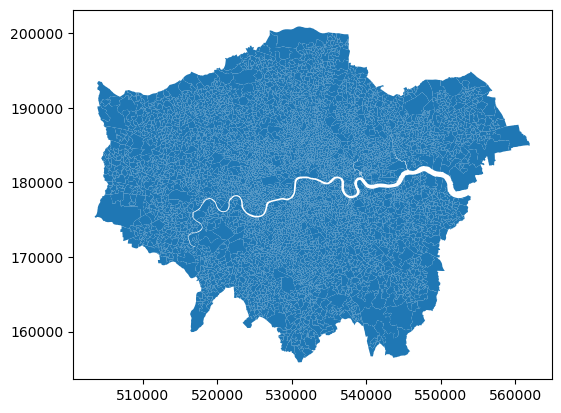

In [70]:
# This plot shows that there are some boundaries missing from the data

CrimeMap_2011.plot()

In [72]:
# Selection of crime data for 2021 only

crime_2021 = crime_final.copy()
crime_2021 = crime_2021 [['LSOA Code', '2021 Crime/1000 people','2021 Population','2021 Non UK Percentage']]

In [73]:
# Merging the 2021 crime data with the 2021 LSOA Boundaries
# Merging the geometry columns based on LSOA Code so that we have a 1-1 mapping between LSOA code, geometry and calculated columns.
# Need to reset the index for LSOA column for later re-use.

CrimeMap_2021 = lsoa_2021.merge(crime_2021)
CrimeMap_2021 = CrimeMap_2021.dissolve('LSOA Code')
CrimeMap_2021.reset_index(inplace=True)

In [74]:
# View of Merged Data

CrimeMap_2021.head(5)

,LSOA Code,geometry,OA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,2021 Crime/1000 people,2021 Population,2021 Non UK Percentage
0,E01000001,"POLYGON ((532267.728 181643.781, 532273.813 18...",E00000001,City of London 001A,None,532250,181864,51.5202,-0.095230,09af0f57-ef7c-448b-b0ba-093649a86e70,NaN,1478,0.408660
1,E01000002,"POLYGON ((532619.141 181847.188, 532618.688 18...",E00000018,City of London 001B,None,532397,181793,51.5195,-0.093140,b9862ded-2d5e-4f2f-9009-951bb8f6ecae,NaN,1382,0.450796
2,E01000003,"POLYGON ((532248.394 181895.350, 532242.313 18...",E00000010,City of London 001C,None,532092,182114,51.5225,-0.097410,eee105a5-6df7-41b7-ba8e-d77deb24493f,NaN,1613,0.429014
3,E01000005,"POLYGON ((533610.974 181410.968, 533615.622 18...",E00000029,City of London 001E,None,533581,181249,51.5144,-0.076290,a5689649-6253-4357-b84c-9fe07fedf0c6,NaN,1098,0.485428
4,E01000006,"POLYGON ((545190.878 184146.158, 545184.886 18...",E00000049,Barking and Dagenham 016A,None,544816,184464,51.5405,0.086831,148eca51-307b-43e3-a746-8ded9845dabf,51.031488,1842,0.517915


<Axes: >

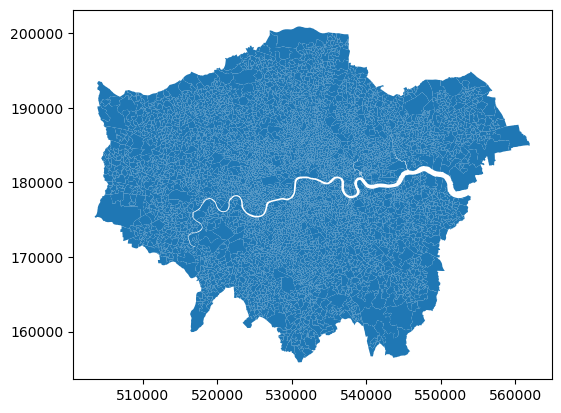

In [75]:
# This plot shows that we are not missing any boundaries for 2021

CrimeMap_2021.plot()

In [189]:
# There are only 6 LSOAs with missing crime rate. LSOA21NMW does not matter to us.

CrimeMap_2021.isnull().sum()

LSOA Code                    0
geometry                     0
OA21CD                       0
LSOA21NM                     0
LSOA21NMW                 4994
BNG_E                        0
BNG_N                        0
LAT                          0
LONG                         0
GlobalID                     0
2021 Crime/1000 people       6
2021 Population              0
2021 Non UK Percentage       0
dtype: int64